<a href="https://colab.research.google.com/github/yiran597/statistics_analysis/blob/main/%E5%85%B3%E9%94%AE%E8%AF%8D%E6%8F%90%E5%8F%96%E5%92%8C%E8%AF%8D%E4%BA%91%E5%88%86%E6%9E%90_with_vader_sentiment_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 词云模型1.0: 关键词提取和词云分析
## 通过提取高频关键词：利用 TF-IDF 或 TextRank 算法来提取评论中的高频词汇，用于分析具体有情感分析指标的数据集

举例：可以使用词云图来展示评论中最常出现的正面关键词，如“love”，“amazing”，“best”等。

作用：从这些关键词中，你可以识别出哪些产品特点或品牌元素在正面评论中最常被提及。

In [37]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [38]:
# Data Review & Audit:
import pandas as pd
comments = pd.read_csv("/content/drive/MyDrive/lilysilk/Data/translated_comments_emoji (1).csv")
comments.shape

(10000, 10)

In [39]:
comments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   publish_number   10000 non-null  object
 1   publish_url      10000 non-null  object
 2   video_id         10000 non-null  object
 3   text_display     9997 non-null   object
 4   like_count       10000 non-null  int64 
 5   published_at     10000 non-null  object
 6   likes            10000 non-null  object
 7   translated_text  10000 non-null  object
 8   emoji_column     4630 non-null   object
 9   text_column      9491 non-null   object
dtypes: int64(1), object(9)
memory usage: 781.4+ KB


In [40]:
# Check is there any missing values need to be omit:
comments['text_column'].isna().sum().sum()

509

In [41]:
comments['like_count'] = pd.to_numeric(comments['like_count'], errors='coerce')  # 如果无法转换，会变成 NaN
comments['likes'] = pd.to_numeric(comments['likes'], errors='coerce')  # 同样的处理
comments['total_likes'] = comments.groupby('publish_number')['like_count'].transform('sum') + comments['likes']
comments['representative_comment_likes'] = comments['like_count'] + comments['likes']

In [42]:
comments.head(1)

,publish_number,publish_url,video_id,text_display,like_count,published_at,likes,translated_text,emoji_column,text_column,total_likes,representative_comment_likes
0,LSYT2328,https://www.youtube.com/watch?v=oHg-pvBMjb4&t=42s,oHg-pvBMjb4,"Beautiful haul, Irene. The purple top is so pr...",0,8/7/22 18:02,77.0,"Beautiful haul, Irene. The purple top is so pr...",NaN,"Beautiful haul, Irene. The purple top is so pr...",80.0,77.0


### Data Pre-processing

In [43]:
## Dropping variables as it will not play any role in text mining
reviews_of_comments = comments.drop(['publish_number'], axis=1).drop(['publish_url'], axis=1).drop(['video_id'], axis=1).drop(['text_display'], axis=1).drop(['like_count'], axis=1).drop(['published_at'], axis=1).drop(['likes'], axis=1).drop(['translated_text'], axis=1).drop(['emoji_column'], axis=1).drop(['total_likes'], axis=1)
reviews_of_comments.head()

,text_column,representative_comment_likes
0,"Beautiful haul, Irene. The purple top is so pr...",77.0
1,"Beautiful pieces you got, love Lilysilk, can\'...",78.0
2,Congrats on your haul Irene. Lily silk packagi...,77.0
3,Congratulations Irene the calvi card holder is...,77.0
4,Fab video. I love the calvi I use it load I ha...,77.0


In [44]:
# 将所有值转换为字符串类型，并将 NaN 替换为空字符串
reviews_of_comments['text_column'] = reviews_of_comments['text_column'].fillna('').astype(str)

In [45]:
## Deal with upper and lowercases
def text_lowercase(text):
    return text.lower()

reviews_of_comments['Reviews_clean']=reviews_of_comments['text_column'].apply(text_lowercase)

In [46]:
## Remove punctuations
import string
string.punctuation

def remove_punct(text):
    text_nonpunc="".join([char for char in text if char not in string.punctuation])
    return text_nonpunc

reviews_of_comments['Reviews_clean']=reviews_of_comments['Reviews_clean'].apply(remove_punct)

In [47]:
## Remove Whitespaces
def remove_whitespaces(text):
    return " ".join(text.split())
reviews_of_comments['Reviews_clean']=reviews_of_comments['Reviews_clean'].apply(lambda x:remove_whitespaces(x))

### Data Tokenization
- stopwords

In [48]:
import re

def tokenize(text):
    tokens = re.split('\W+', text)
    return tokens

reviews_of_comments['Reviews_clean'] = reviews_of_comments['Reviews_clean'].apply(lambda x: tokenize(x))

In [49]:
## Remove stopwords
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
stop = stopwords.words('english')

def remove_stopwords(tokenized_list):
    filtered_text=[word for word in tokenized_list if word not in stop]
    return filtered_text

reviews_of_comments['Reviews_clean']=reviews_of_comments['Reviews_clean'].apply(lambda x:remove_stopwords(x))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [50]:
reviews_of_comments.head()

,text_column,representative_comment_likes,Reviews_clean
0,"Beautiful haul, Irene. The purple top is so pr...",77.0,"[beautiful, haul, irene, purple, top, pretty, ..."
1,"Beautiful pieces you got, love Lilysilk, can\'...",78.0,"[beautiful, pieces, got, love, lilysilk, cant,..."
2,Congrats on your haul Irene. Lily silk packagi...,77.0,"[congrats, haul, irene, lily, silk, packaging,..."
3,Congratulations Irene the calvi card holder is...,77.0,"[congratulations, irene, calvi, card, holder, ..."
4,Fab video. I love the calvi I use it load I ha...,77.0,"[fab, video, love, calvi, use, load, exact, co..."


### Lemmatization

In [51]:
import nltk
nltk.download('wordnet')
wn=nltk.stem.WordNetLemmatizer()

def lemmatizing(text):
    lemma=[wn.lemmatize(word) for word in text]
    return lemma
reviews_of_comments['Reviews_clean']=reviews_of_comments['Reviews_clean'].apply(lemmatizing)

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


### Find the number of most frequent words by using supervised learning methods:

In [52]:
word_count={}

for sentence in reviews_of_comments['Reviews_clean']:
    for word in sentence:
        if word not in word_count:
            word_count[word]=1
        else:
            word_count[word]+=1

## Converting word_count into the dataframe
word_frequency = pd.DataFrame(word_count.items(), columns=['word','word_count'])
word_frequency = word_frequency.sort_values('word_count', ascending=False).reset_index(drop=True)
word_frequency.head()

,word,word_count
0,love,2856
1,look,1550
2,video,1491
3,like,1177
4,beautiful,1094


### Word Cloud

In [53]:
pip install wordcloud

In [54]:
from wordcloud import WordCloud, STOPWORDS

import matplotlib.pyplot as plt
%matplotlib inline

In [55]:
comment_words=''
stopwords=set(STOPWORDS)

for x in comments.text_column:

    x=str(x)

    tokens=x.split()

    for i in range(len(tokens)):
        tokens[i]=tokens[i].lower()

    for y in tokens:
        comment_words=comment_words+y+' '

In [56]:
wordcloud=WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)

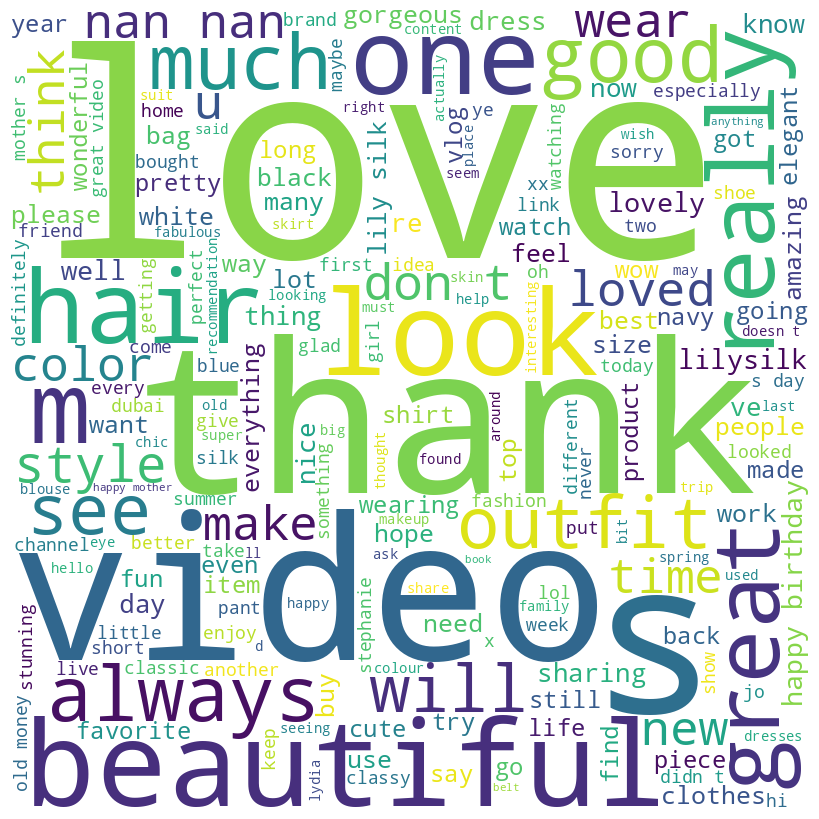

In [57]:
plt.figure(figsize = (8, 10))
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)

### Word Cloud of Each Video

In [59]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# 先根据 'publish_number' 划分数据
grouped = comments.groupby('publish_number')

# 对每个分组（每个视频）生成一个独立的词云
for video_id, group in grouped:
    # 提取每个视频的评论文本
    text = ' '.join(group['text_column'].dropna())  # 合并所有评论为一个文本

    # 生成词云
    wordcloud = WordCloud(width=800, height=400).generate(text)

    # 显示词云
    #plt.figure(figsize=(10, 5))
    #plt.imshow(wordcloud, interpolation='bilinear')
    #plt.axis('off')
    #plt.title(f"Wordcloud for Video {video_id}")
    #plt.show()

因为单独展现每一个词云会导致文件过大，无法保存到github，所以先变成备注储存。